In [1]:
import os
os.getcwd()
os.chdir('../src')

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
from time import perf_counter
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from d01_data.load_data import load_from_db

In [7]:
POWER_DATA=1
power_df = load_from_db(POWER_DATA, notebook=True)

In [8]:
power_df

Time
2003-01-01    5.993009e+05
2003-01-02    7.193424e+05
2003-01-03    7.165481e+05
2003-01-04    6.375116e+05
2003-01-05    6.046507e+05
                  ...     
2022-12-28    1.063652e+06
2022-12-29    9.325254e+05
2022-12-30    9.328208e+05
2022-12-31    9.314756e+05
2023-01-01    3.639931e+04
Freq: D, Name: ERCOT, Length: 7306, dtype: float64

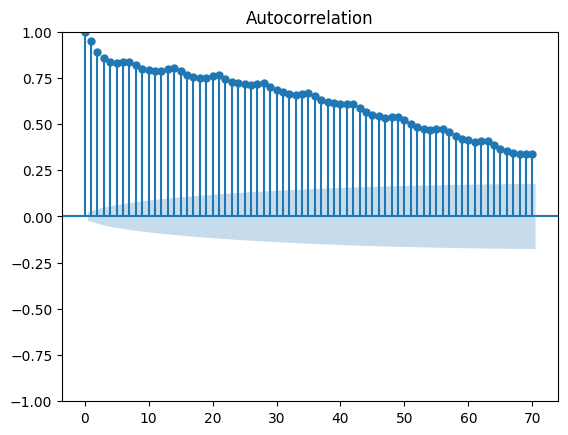

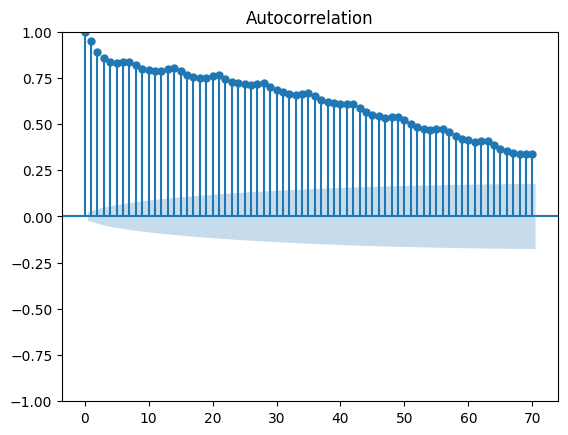

In [12]:
plot_acf(power_df, lags=70)# estimate MA

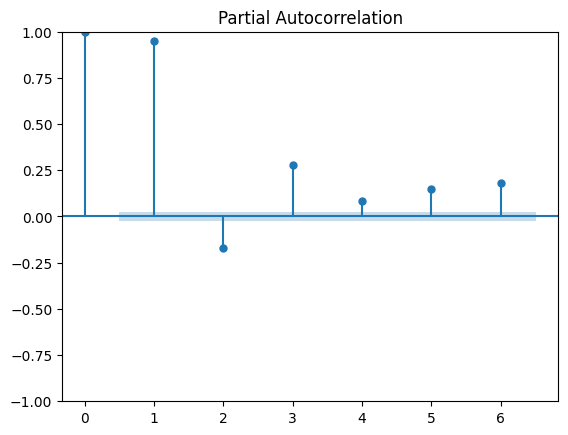

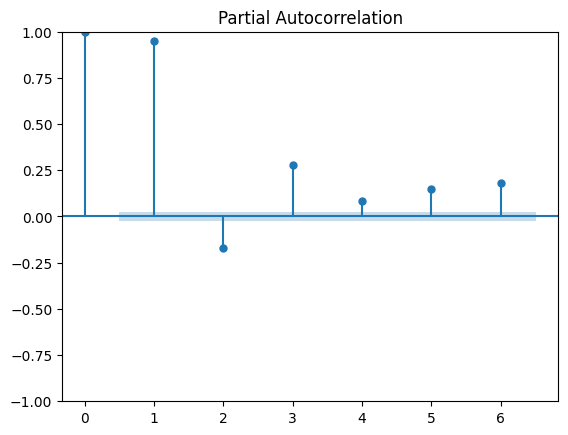

In [16]:
plot_pacf(power_df, lags=6) # estimate AR

In [41]:
px.line(power_df.loc['2020':'2022'])

There is obviously seasonality here

In [43]:
px.line(power_df.loc['2020':'2022'].diff())

Looks like an I(1) would be good

In [100]:
start_date = power_df.index[0] + timedelta(days=500)
first_train = power_df.loc[start_date:start_date + timedelta(days=500)]
test = power_df.loc[start_date + timedelta(days=70 + 1)]

In [101]:
unfitted_6_1_70 = ARIMA(first_train, order=(6,0,70))

In [102]:
px.line(first_train)

In [103]:
start_time = perf_counter()
arima_6_1_70 = unfitted_6_1_70.fit()
print(f'Took {perf_counter() - start_time} to fit')

/home/jerome/project-popsickle/project-popsickle-venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



KeyboardInterrupt: 